## Part-I Algorithms Explained

### 1. Gradient Descent (GD/Batch GD)
Gradient Descent is an optimization algorithm that updates model parameters by computing the gradient of the loss function with respect to all training data. In Batch GD, the entire dataset is used to calculate the gradient at each step, leading to stable but potentially slow convergence.

### 2. Minibatch SGD
Minibatch Stochastic Gradient Descent splits the dataset into small batches. The model parameters are updated after each batch, balancing the stability of Batch GD and the speed of Stochastic GD. This approach is widely used in deep learning due to its efficiency and ability to leverage parallel hardware.

### 3. Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates model parameters for each training example individually. This introduces more noise in the updates, which can help escape local minima but may also cause the optimization path to fluctuate.


In [36]:


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [37]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)


Dataset Information:
Training data shape: (60000, 28, 28) (60,000 images)
Test data shape: (10000, 28, 28) (10,000 images)
Pixel range: 0.0-1.0
Number of classes: 10


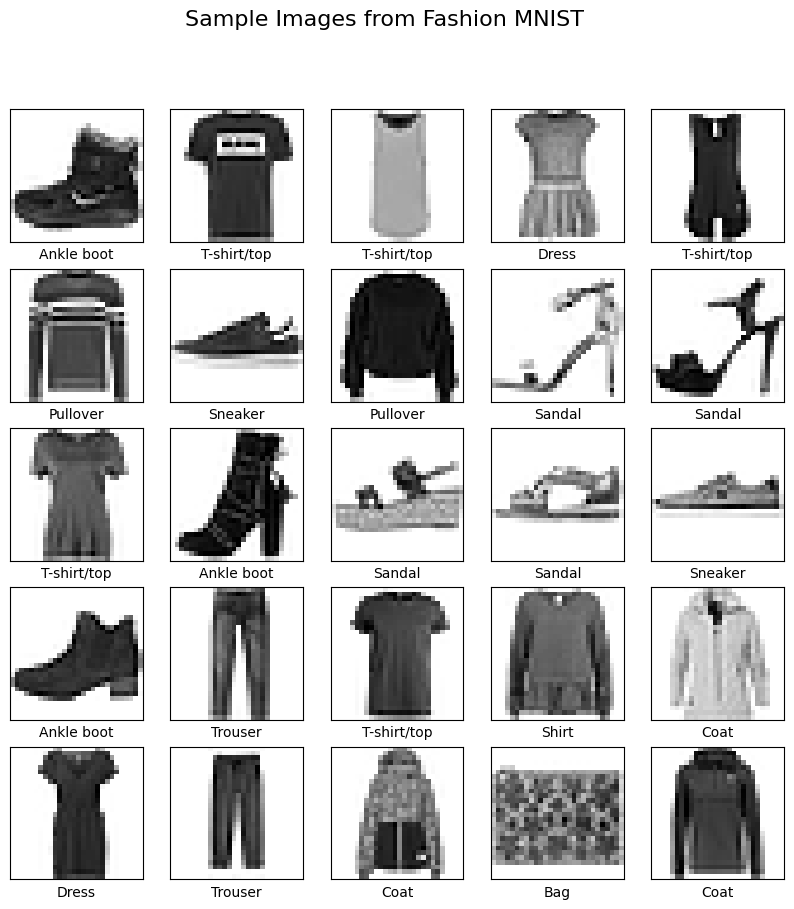

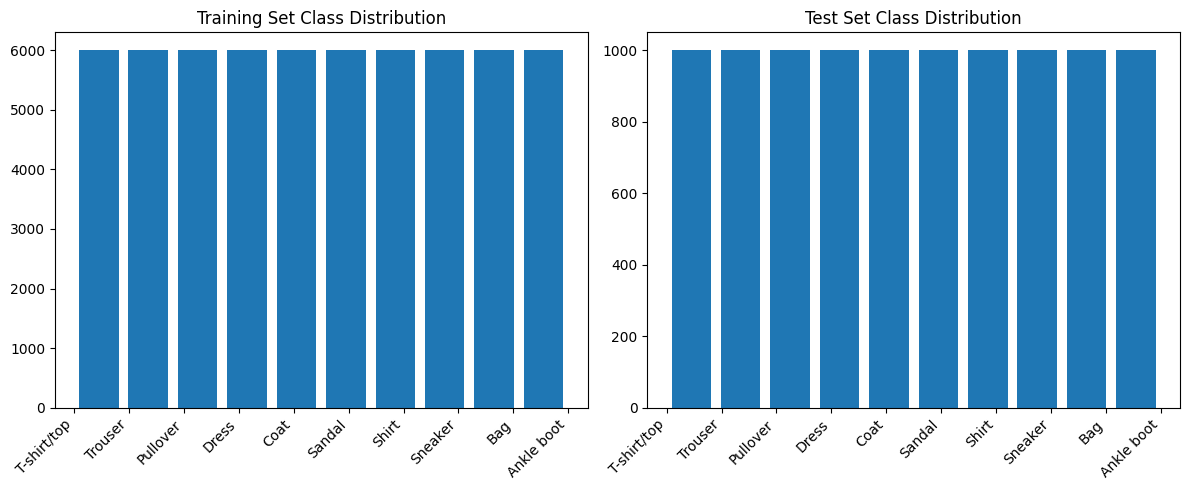

In [38]:
# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display basic dataset information
print("Dataset Information:")
print(f"Training data shape: {x_train.shape} (60,000 images)")
print(f"Test data shape: {x_test.shape} (10,000 images)")
print(f"Pixel range: {np.min(x_train)}-{np.max(x_train)}")
print(f"Number of classes: {len(class_names)}")

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.show()


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train_labels, bins=10, rwidth=0.8)
plt.title("Training Set Class Distribution")
plt.xticks(range(10), class_names, rotation=45, ha='right')

plt.subplot(1,2,2)
plt.hist(test_labels, bins=10, rwidth=0.8)
plt.title("Test Set Class Distribution")
plt.xticks(range(10), class_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [39]:
from tensorflow.keras.utils import to_categorical
y_train_cat, y_test_cat = to_categorical(train_labels), to_categorical(train_labels)


In [ ]:
# Part-I Optimizers (as callables to avoid reusing instances)
optimizers = {
    "Batch GD": lambda: tf.keras.optimizers.SGD(),
    "MiniBatch SGD": lambda: tf.keras.optimizers.SGD(),
    "Stochastic GD": lambda: tf.keras.optimizers.SGD(),
}


In [ ]:
from tensorflow.keras.models import Sequential

# Dictionary to store results
results = {}

# Model definition function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(True)


for name, get_optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
    if name == "Batch GD":
        batch_size = len(x_train)  # entire training set
    elif name == "MiniBatch SGD":
        batch_size = 64
    else:  # Stochastic GD
        batch_size = 1

    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=batch_size, verbose=0, validation_split=0.1)

    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

Training with Batch GD optimizer...


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 10000
'y' sizes: 60000
